## Data viz with 3-d charts
## Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

%matplotlib inline

In [3]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [20]:
x_1 = np.linspace(start=-2, stop=2, num=200)
y_1 = np.linspace(start=-2, stop=2, num=200)

x_1, y_1 = np.meshgrid(x_1, y_1)

print(x_1.shape)

(200, 200)


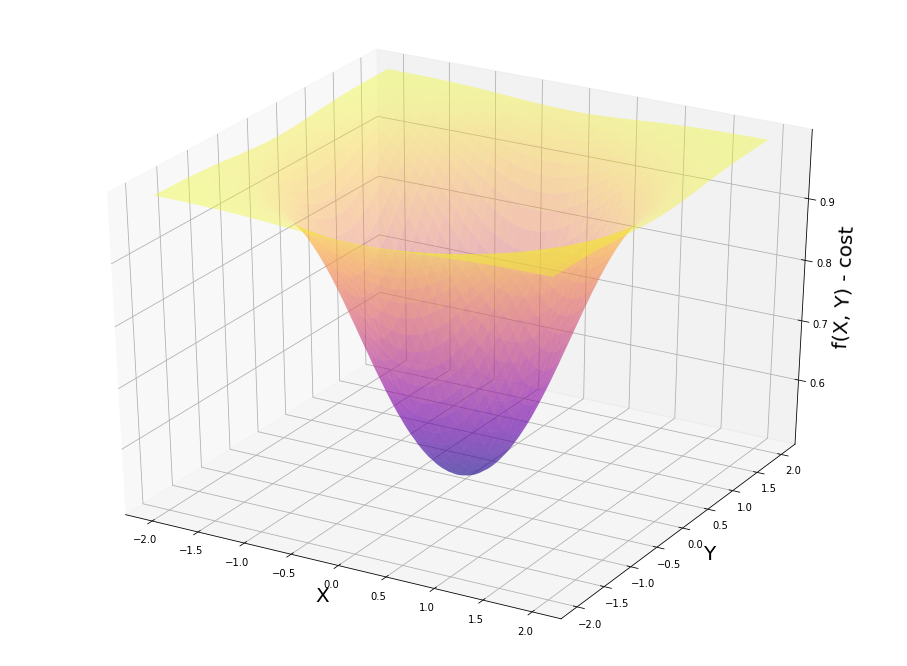

In [53]:
# Generating 3-d plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(X, Y) - cost', fontsize=20)

ax.plot_surface(x_1, y_1, f(x_1, y_1), cmap=cm.plasma, alpha=0.4)

plt.show()


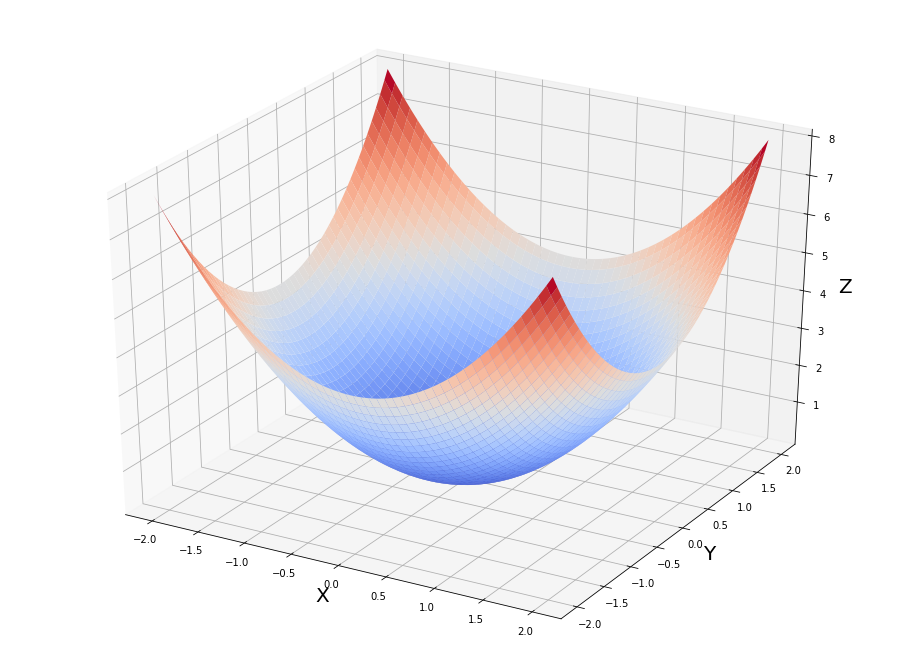

In [40]:
fig1 = plt.figure(figsize=[16, 12])
ax1 = fig1.gca(projection='3d')

ax1.set_xlabel('X', fontsize=20)
ax1.set_ylabel('Y', fontsize=20)
ax1.set_zlabel('Z', fontsize=20)

ax1.plot_surface(x_1, y_1, f1(x_1, y_1), cmap=cm.coolwarm)
plt.show()

In [38]:
def f1(x, y):
    return x**2 + y**2


## Partial Derivatives & Symbolic Computation

In [66]:
a, b = symbols('x, y')
print("Our cost function is ", f(a, b))
print("Derivative of cost function w.r.t a is ", diff(f(a, b), a))
f(a, b).evalf(subs={a:1.8, b:1.0}) # Python dictionary

Our cost function is  1/(3**(-x**2 - y**2) + 1)
Derivative of cost function w.r.t a is  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2


0.990604794032582

In [68]:
diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}) # Value of the partial derivative of the cost function f w.r.t a

0.0368089716197505

In [74]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess


for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a: params[0], b: params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a: params[0], b: params[1]})
    gradient = np.array([gradient_x, gradient_y])
    params = params - gradient * multiplier

print("value of gradient at Minimum value : ", gradient)
print("value of x at minimum value : ", params[0])
print("value of y at minimum value : ", params[1])
print("The cost is ", f(a, b).evalf(subs={a : params[0], b : params[1]}))


value of gradient at Minimum value :  [2.01013037525579e-11 1.11673909736433e-11]
value of x at minimum value :  3.45838599885832e-11
value of y at minimum value :  1.92132555492129e-11
The cost is  0.500000000000000
